In [1]:
#importando bibliotecas

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
from scipy import stats
from scipy.stats import norm 
import warnings 
warnings.filterwarnings('ignore') #ignore warnings

%matplotlib inline
import gc

In [2]:
stores=pd.read_csv("C:/Users/sony/OneDrive/Documentos/teste_ds_ze/stores.csv")

FileNotFoundError: [Errno 2] File b'C:/Users/sony/OneDrive/Documentos/teste_ds_ze/stores.csv' does not exist: b'C:/Users/sony/OneDrive/Documentos/teste_ds_ze/stores.csv'

In [3]:
stores

NameError: name 'stores' is not defined

In [4]:
features = pd.read_csv("C:\\Users\\sony\\OneDrive\\Documentos\\features.csv")


FileNotFoundError: [Errno 2] File b'C:\\Users\\sony\\OneDrive\\Documentos\\features.csv' does not exist: b'C:\\Users\\sony\\OneDrive\\Documentos\\features.csv'

In [5]:
features

NameError: name 'features' is not defined

In [6]:
test = pd.read_csv("C:\\Users\\sony\\OneDrive\\Documentos\\test.csv")

FileNotFoundError: [Errno 2] File b'C:\\Users\\sony\\OneDrive\\Documentos\\test.csv' does not exist: b'C:\\Users\\sony\\OneDrive\\Documentos\\test.csv'

In [7]:
test

NameError: name 'test' is not defined

In [8]:
train = pd.read_csv("C:\\Users\\sony\\OneDrive\\Documentos\\train.csv")

FileNotFoundError: [Errno 2] File b'C:\\Users\\sony\\OneDrive\\Documentos\\train.csv' does not exist: b'C:\\Users\\sony\\OneDrive\\Documentos\\train.csv'

In [9]:
train

NameError: name 'train' is not defined

** Análise **
1. As vendas podem responder ao fator tempo e espaço
2. Os registros de vendas da loja são a agregação de cada departamento
3. A variável de data pode ser dividida em variáveis y / m / w / d
4. A variável dia pode fornecer muitas informações sobre vendas
5. Dados externos, como feriado nacional dos EUA, serão combinados para adicionar informações

In [10]:
print("the structure of train data is ", train.shape)
print("the structure of test  data is ", test.shape)
print("the ratio of train data : test data is ", (round(train.shape[0]*100/(train.shape[0]+test.shape[0])),100-round(train.shape[0]*100/(train.shape[0]+test.shape[0]))))

NameError: name 'train' is not defined

In [11]:
train=train.merge(stores, on='Store', how='left')
train.head()

NameError: name 'train' is not defined

In [12]:
dataset  =  pd.merge(stores, features) 
dataset

NameError: name 'stores' is not defined

In [13]:
sns.pairplot(dataset)

NameError: name 'dataset' is not defined

In [14]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['weeklySales'])
    plt.ylabel('weeklySales')
    plt.xlabel(column)

In [15]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['weeklySales'])
    plt.ylabel('weeklySales')
    plt.xlabel(column)

scatter(dataset, 'Fuel_Price')
scatter(dataset, 'Size')
scatter(dataset, 'CPI')
scatter(dataset, 'Type')
scatter(dataset, 'isHoliday')
scatter(dataset, 'Unemployment')
scatter(dataset, 'Temperature')
scatter(dataset, 'Store')
scatter(dataset, 'Dept')

In [16]:
fig = plt.figure(figsize=(18, 14))
corr = dataset.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

NameError: name 'dataset' is not defined

<Figure size 1296x1008 with 0 Axes>

In [17]:
sns.pairplot(dataset, vars=['weeklySales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

NameError: name 'dataset' is not defined

In [18]:
sns.pairplot(dataset, vars=[ 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

NameError: name 'dataset' is not defined

In [19]:
Year=pd.Series(train['Year'].unique())
Week=pd.Series(train['Week'].unique())
Month=pd.Series(train['Month'].unique())
Day=pd.Series(train['Day'].unique())
n_days=pd.Series(train['n_days'].unique())

NameError: name 'train' is not defined

* A tabela de lojas consiste em três colunas ** 1. ID da loja 2. tipo de loja 3. tamanho da loja. **
* A, B e C são os tipos de lojas e um total de 45 lojas do Walmart estão vendendo mercadorias para os clientes


In [20]:
print("the shape of stores data set is", stores.shape)
print("the unique value of store is", stores['Store'].unique())
print("the unique value of Type is", stores['Type'].unique())

NameError: name 'stores' is not defined

* Vamos fazer um gráfico de pizza para mostrar a proporção dos tipos A, B e C do total de 45 lojas Walmart.
* Primeiro, vamos agrupar os dados por tipo de loja e ver as figuras descritivas

In [21]:
print(stores.head())
grouped=stores.groupby('Type')
print(grouped.describe()['Size'].round(2))

NameError: name 'stores' is not defined

In [22]:
plt.style.use('ggplot')
labels=['A store','B store','C store']
sizes=grouped.describe()['Size'].round(1)
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100] # convert to the proportion


fig, axes = plt.subplots(1,1, figsize=(10,10))

wprops={'edgecolor':'black',
      'linewidth':2}

tprops = {'fontsize':30}


axes.pie(sizes,
        labels=labels,
        explode=(0.02,0,0),
        autopct='%1.1f%%',
        pctdistance=0.6,
        labeldistance=1.2,
        wedgeprops=wprops,
        textprops=tprops,
        radius=0.8,
        center=(0.5,0.5))
plt.show()


NameError: name 'grouped' is not defined

In [23]:
data = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=data)

NameError: name 'stores' is not defined

* A suposição 1 está correta. Por boxplot, podemos inferir que a loja do tipo A é a maior e C é a menor
* Ainda mais, não há área sobreposta em tamanho entre A, B e C. O tipo é o melhor preditor para Tamanho
* Para verificar a suposição 2, é feito um boxplot mostrando a relação entre vendas e tipo

In [24]:
data = pd.concat([train['Type'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=data, showfliers=False)

NameError: name 'train' is not defined

* A mediana de A é a mais alta e C é a mais baixa
* Isso significa que lojas com mais tamanhos têm maior recorde de vendas (a ordem da mediana do tamanho e da mediana das vendas é a mesma)

NameError: name 'train' is not defined

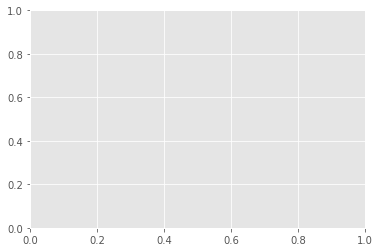

In [25]:
plt.style.use('ggplot')

fig=plt.figure()
ax=fig.add_subplot(111)

ax.scatter(train['Size'],train['Weekly_Sales'], alpha=0.5)

plt.show()

* O resultado não é tão bom. Não pode haver relação distinta entre tamanho e vendas.
* Parece um pouco linear
* Para torná-lo mais claro, faceta dados com tipo de loja (A, B, C)

In [26]:
types=stores['Type'].unique()

plt.style.use('ggplot')

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)

for t in types:
    x=train.loc[train['Type']==t, 'Size']
    y=train.loc[train['Type']==t, 'Weekly_Sales']
    
    ax.scatter(x,y,alpha=0.5, label=t)

ax.set_title('Scatter plot size and sales by store type')
ax.set_xlabel('Size')
ax.set_ylabel('Weekly_Sales')

ax.legend(loc='higher right',fontsize=12)

plt.show()

NameError: name 'stores' is not defined

* O tipo de lapidação não fornece informações adicionais, exceto a relação entre tamanho e tipo

In [27]:
train.head()

NameError: name 'train' is not defined

In [28]:
data = pd.concat([train['Store'], train['Weekly_Sales'], train['Type']], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data, showfliers=False, hue="Type")

NameError: name 'train' is not defined

* A loja pode ser a variável que fornece informações sobre vendas
* Mas a loja inclui muitas informações intrínsecas de tipo, tamanho e departamento

In [29]:
data = pd.concat([train['Store'], train['Weekly_Sales'], train['IsHoliday']], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data, showfliers=False, hue="IsHoliday")

NameError: name 'train' is not defined

Holiday e Store não mostram relações significativas, mas apenas pequenas vendas mais altas disparam quando hoiliday

In [30]:
data = pd.concat([train['Dept'], train['Weekly_Sales'], train['Type']], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=data, showfliers=False)

NameError: name 'train' is not defined

In [31]:
data = pd.concat([train['Dept'], train['Weekly_Sales'], train['Type']], axis=1)
f, ax = plt.subplots(figsize=(10, 50))
fig = sns.boxplot(y='Dept', x='Weekly_Sales', data=data, showfliers=False, hue="Type",orient="h") 

NameError: name 'train' is not defined

* Cada departamento mostra os diferentes níveis de vendas
* O departamento pode ser a variável poderosa para prever vendas
* Quando departamento e tipo de loja são considerados juntos, geralmente o departamento do tipo A mostra o maior recorde de vendas

Suposição 4: Tipo e departamento podem ter o efeito de interação

In [32]:
data = pd.concat([train['Dept'], train['Weekly_Sales'], train['IsHoliday']], axis=1)
f, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=data, showfliers=False, hue="IsHoliday")

NameError: name 'train' is not defined

* Diferente da relação de loja e feriado, departamento e feriado não explicam nenhuma relação
* 72 departamento mostra o maior aumento nas vendas durante as férias
* No entanto, outros não e ainda mais em alguns dopartments as vendas que não são de feriados são maiores.
* Isso significa que o caráter do produto (departamento) é diferente da relação com as vendas

In [33]:
train.head()

NameError: name 'train' is not defined

NameError: name 'train' is not defined

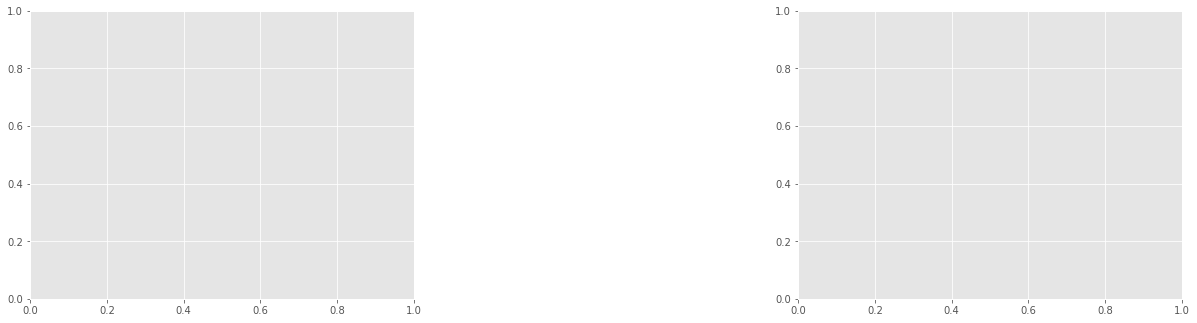

In [34]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize = (20,5))
fig.subplots_adjust(wspace=1, hspace=1)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

sales_holiday=train[['IsHoliday','Weekly_Sales']]
target=[sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==True],sales_holiday['Weekly_Sales'].loc[sales_holiday['IsHoliday']==False]]
labels=['Holiday','Not Holiday']

#median
medianprop={'color':'#2196F3',
            'linewidth': 2,
            'linestyle':'-'}

# outliers

flierprop={'color' : '#EC407A',
          'marker' : 'o',
          'markerfacecolor': '#2196F3',
          'markeredgecolor':'white',
          'markersize' : 3,
          'linestyle' : 'None',
          'linewidth' : 0.1}



axes[0].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)




axes[1].boxplot(target,labels=labels, patch_artist = 'Patch',
                  showmeans=True,
                  flierprops=flierprop,
                  medianprops=medianprop)

axes[1].set_ylim(-6000,80000)

plt.show()




In [35]:
print(train[train['IsHoliday']==True]['Weekly_Sales'].describe().round(1))
print(train[train['IsHoliday']==False]['Weekly_Sales'].describe().round(1))

NameError: name 'train' is not defined

* Vendas em feriados são um pouco mais que vendas em feriados não

In [36]:
train.head()

NameError: name 'train' is not defined

In [37]:
data = pd.concat([train['Month'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data, showfliers=False)

NameError: name 'train' is not defined

In [38]:
data = pd.concat([train['Month'], train['Weekly_Sales'],train['IsHoliday']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data, showfliers=False, hue='IsHoliday')

NameError: name 'train' is not defined

In [39]:
data = pd.concat([train['Month'], train['Weekly_Sales'],train['Type']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Month', y="Weekly_Sales", data=data, showfliers=False, hue='Type')

NameError: name 'train' is not defined

In [40]:
data = pd.concat([train['Year'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Year', y="Weekly_Sales", data=data, showfliers=False)

NameError: name 'train' is not defined

In [41]:
data = pd.concat([train['Week'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Week', y="Weekly_Sales", data=data, showfliers=False)

NameError: name 'train' is not defined

NameError: name 'train' is not defined

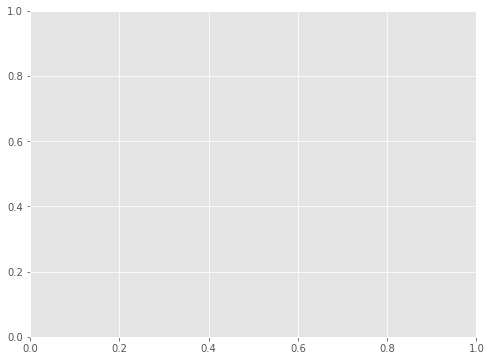

In [42]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['Weekly_Sales'])

In [43]:
print("Skewness: ", train['Weekly_Sales'].skew()) #skewness
print("Kurtosis: ", train['Weekly_Sales'].kurt()) #kurtosis

NameError: name 'train' is not defined

In [44]:
train['Weekly_Sales'].min()

NameError: name 'train' is not defined

NameError: name 'train' is not defined

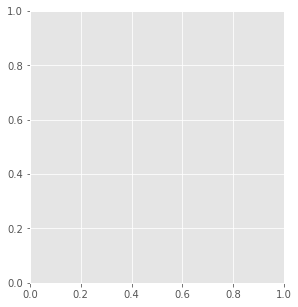

In [45]:
fig = plt.figure(figsize = (10,5))

fig.add_subplot(1,2,1)
res = stats.probplot(train.loc[train['Weekly_Sales']>0,'Weekly_Sales'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(train.loc[train['Weekly_Sales']>0,'Weekly_Sales']), plot=plt)

In [46]:
train.describe()['Weekly_Sales']

NameError: name 'train' is not defined

In [47]:
train_over_zero=train[train['Weekly_Sales']>0]
train_below_zero=train[train['Weekly_Sales']<=0]
sales_over_zero = np.log1p(train_over_zero['Weekly_Sales'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(sales_over_zero)

NameError: name 'train' is not defined

In [48]:
print("Skewness: ", sales_over_zero.skew()) #skewness
print("Kurtosis: ", sales_over_zero.kurt()) #kurtosis

NameError: name 'sales_over_zero' is not defined

In [49]:
grouped=train.groupby(['Dept','Date']).mean().round(0).reset_index()
print(grouped.shape)
print(grouped.head())
data=grouped[['Dept','Date','Weekly_Sales']]


dept=train['Dept'].unique()
dept.sort()
dept_1=dept[0:20]
dept_2=dept[20:40]
dept_3=dept[40:60]
dept_4=dept[60:]

fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for i in dept_1 :
    data_1=data[data['Dept']==i]
    ax[0,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')

for i in dept_2 :
    data_1=data[data['Dept']==i]
    ax[0,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')
    
for i in dept_3 :
    data_1=data[data['Dept']==i]
    ax[1,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')    

for i in dept_4 :
    data_1=data[data['Dept']==i]
    ax[1,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')        
    
ax[0,0].set_title('Mean sales record by department(0~19)')
ax[0,1].set_title('Mean sales record by department(20~39)')
ax[1,0].set_title('Mean sales record by department(40~59)')
ax[1,1].set_title('Mean sales record by department(60~)')


ax[0,0].set_ylabel('Mean sales')
ax[0,0].set_xlabel('Date')
ax[0,1].set_ylabel('Mean sales')
ax[0,1].set_xlabel('Date')
ax[1,0].set_ylabel('Mean sales')
ax[1,0].set_xlabel('Date')
ax[1,1].set_ylabel('Mean sales')
ax[1,1].set_xlabel('Date')


plt.show()

NameError: name 'train' is not defined

Pelo gráfico de linhas, podemos ver os seguintes
* O nível de vendas é diferente por departamento e o nível de registro de vendas de um departamento é estável
* Existem alguns pontos altos em janeiro e maio. Portanto, pode haver um evento para altas vendas
* Alguns departamentos estão altamente relacionados com esses eventos. Assim, o recorde de vendas sobe acentuadamente em torno de janeiro ou maio

* Conclusão 1: Departamento é um bom recurso para prever vendas
* Couclusion 2: Date (especialmente event) é um bom recurso para prever vendas

1. Como departamento, séries temporais de vendas por loja mostrarão tendência de vendas
2. Suposição: Como departamento, a loja dará uma sensação de nível de vendas
3. Suposição_2: Além disso, isso também dará o dia das vendas mais altas

In [50]:
grouped=train.groupby(['Store','Date']).mean().round(0).reset_index()
grouped.shape
grouped.head()

data=grouped[['Store','Date','Weekly_Sales']]
type(data)


store=train['Store'].unique()
store.sort()
store_1=store[0:5]
store_2=store[5:10]
store_3=store[10:15]
store_4=store[15:20]
store_5=store[20:25]
store_6=store[25:30]
store_7=store[30:35]
store_8=store[35:40]
store_9=store[40:]

fig, ax = plt.subplots(5,2,figsize=(20,15))

fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for i in store_1 :
    data_1=data[data['Store']==i]
    ax[0,0].plot(data_1['Date'], data_1['Weekly_Sales'])
    
for i in store_2 :
    data_2=data[data['Store']==i]
    ax[0,1].plot(data_2['Date'], data_2['Weekly_Sales'])
    
for i in store_3 :
    data_3=data[data['Store']==i]
    ax[1,0].plot(data_3['Date'], data_3['Weekly_Sales'])

for i in store_4 :
    data_4=data[data['Store']==i]
    ax[1,1].plot(data_4['Date'], data_4['Weekly_Sales'])
    
for i in store_5 :
    data_5=data[data['Store']==i]
    ax[2,0].plot(data_5['Date'], data_5['Weekly_Sales'])  

for i in store_6 :
    data_6=data[data['Store']==i]
    ax[2,1].plot(data_6['Date'], data_6['Weekly_Sales'])  

for i in store_7 :
    data_7=data[data['Store']==i]
    ax[3,0].plot(data_7['Date'], data_7['Weekly_Sales'])      

for i in store_8 :
    data_8=data[data['Store']==i]
    ax[3,1].plot(data_8['Date'], data_8['Weekly_Sales'])     
    
for i in store_9 :
    data_9=data[data['Store']==i]
    ax[4,0].plot(data_9['Date'], data_9['Weekly_Sales'])     

    
ax[0,0].set_title('Mean sales record by store(0~4)')
ax[0,1].set_title('Mean sales record by store(5~9)')
ax[1,0].set_title('Mean sales record by store(10~14)')
ax[1,1].set_title('Mean sales record by store(15~19)')
ax[2,0].set_title('Mean sales record by store(20~24)')
ax[2,1].set_title('Mean sales record by store(25~29)')
ax[3,0].set_title('Mean sales record by store(30~34)')
ax[3,1].set_title('Mean sales record by store(35~39)')
ax[4,0].set_title('Mean sales record by store(40~)')



ax[0,0].set_ylabel('Mean sales')
ax[0,0].set_xlabel('Date')
ax[0,1].set_ylabel('Mean sales')
ax[0,1].set_xlabel('Date')
ax[1,0].set_ylabel('Mean sales')
ax[1,0].set_xlabel('Date')
ax[1,1].set_ylabel('Mean sales')
ax[1,1].set_xlabel('Date')
ax[2,0].set_ylabel('Mean sales')
ax[2,0].set_xlabel('Date')
ax[2,1].set_ylabel('Mean sales')
ax[2,1].set_xlabel('Date')
ax[3,0].set_ylabel('Mean sales')
ax[3,0].set_xlabel('Date')
ax[3,1].set_ylabel('Mean sales')
ax[3,1].set_xlabel('Date')
ax[4,0].set_ylabel('Mean sales')
ax[4,0].set_xlabel('Date')



plt.show()

NameError: name 'train' is not defined

1. Suposição: o maior dia de vendas (por exemplo, Cristo mas) fornecerá alto poder de previsão
2. Suposição: o maior dia de vendas será diferente por departamento e loja (por exemplo, alguns departamentos não são sensíveis ao Chisrt mas)
3. Portanto, extraia o dia mais alto e combine esse dia com o conjunto de dados do trem

###Possivel conclusao####

1. Em conclusão, as informações mais altas do dia de vendas fornecerão poder para prever
2. A contagem 1 (o maior dia de vendas por departamento e loja) mostra mediana superior à contagem 0 (dia normal de vendas)

In [51]:
import pandas as pd
features = pd.read_csv("../input/features.csv")

FileNotFoundError: [Errno 2] File b'../input/features.csv' does not exist: b'../input/features.csv'

In [52]:
import pandas as pd
test = pd.read_csv("../input/test.csv")

FileNotFoundError: [Errno 2] File b'../input/test.csv' does not exist: b'../input/test.csv'

In [53]:
import pandas as pd
train = pd.read_csv("../input/train.csv")

FileNotFoundError: [Errno 2] File b'../input/train.csv' does not exist: b'../input/train.csv'